# Exercise Chapter 1 
Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mistat
from scipy import stats

def trim_std(data, alpha):
  """ Calculate trimmed standard deviation """
  data = np.array(data)
  data.sort()
  n = len(data)
  low = int(n * alpha) + 1
  high = int(n * (1 - alpha))
  return data[low:(high + 1)].std()

# Exercise 1

In [3]:
import random
random.seed(1)
values = random.choices([1, 2, 3, 4, 5, 6], k=50)

In [4]:
from collections import Counter
Counter(values)

Counter({1: 9, 6: 9, 5: 8, 2: 10, 3: 10, 4: 4})

# Exercise 2

In [5]:
random.seed(1)
x = list(range(50))
y = [5 + 2.5 * xi for xi in x]
y = [yi + random.uniform(-10, 10) for yi in y]

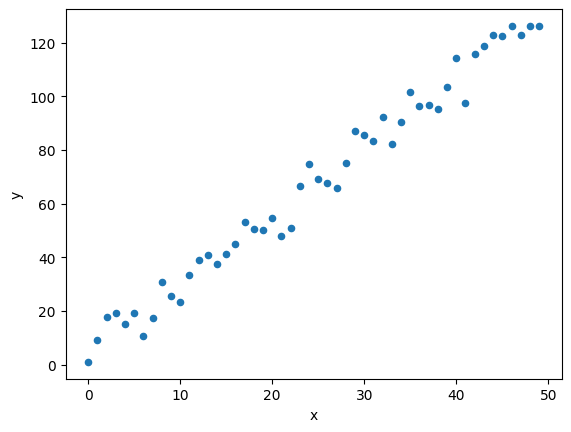

In [6]:
x = list(range(50))
y = [5 + 2.5 * xi for xi in x]
y = [yi + random.uniform(-10, 10) for yi in y]
pd.DataFrame({'x': x, 'y': y}).plot.scatter(x='x', y='y')
plt.show()

# Exercise 3

In [7]:
from scipy.stats import binom
np.random.seed(1)

for p in (0.1, 0.3, 0.7, 0.9):
  X = binom.rvs(1, p, size=50)
  print(p, sum(X))

0.1 4
0.3 12
0.7 33
0.9 43


# Exercise 4

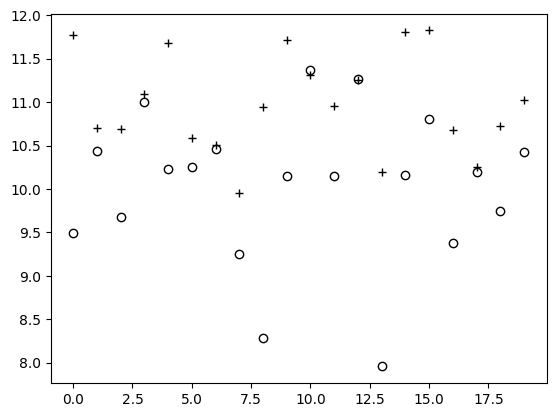

mean inst1 10.03366815
stdev inst1 0.8708144577963102
mean inst2 10.98302505
stdev inst2 0.5685555119253366


In [8]:
inst1 = [9.490950, 10.436813, 9.681357, 10.996083, 10.226101, 10.253741,
         10.458926, 9.247097, 8.287045, 10.145414, 11.373981, 10.144389,
         11.265351, 7.956107, 10.166610, 10.800805, 9.372905, 10.199018,
         9.742579, 10.428091]
inst2 = [11.771486, 10.697693, 10.687212, 11.097567, 11.676099,
         10.583907, 10.505690, 9.958557, 10.938350, 11.718334,
         11.308556, 10.957640, 11.250546, 10.195894, 11.804038,
         11.825099, 10.677206, 10.249831, 10.729174, 11.027622]
ax = pd.Series(inst1).plot(marker='o', linestyle='none',
                           fillstyle='none', color='black')
pd.Series(inst2).plot(marker='+', linestyle='none', ax=ax,
                      fillstyle='none', color='black')
plt.show()

print('mean inst1', np.mean(inst1))
print('stdev inst1', np.std(inst1, ddof=1))
print('mean inst2', np.mean(inst2))
print('stdev inst2', np.std(inst2, ddof=1))

# Exercise 6

In [9]:
import random
random.choices(range(1, 101), k=20)

[6, 88, 57, 20, 51, 49, 36, 35, 54, 63, 62, 46, 3, 23, 18, 59, 87, 80, 80, 82]

# Exercise 7

In [10]:
import random
random.sample(range(11, 31), 10)

[19, 12, 13, 28, 11, 18, 26, 23, 15, 14]

# Exercise 10

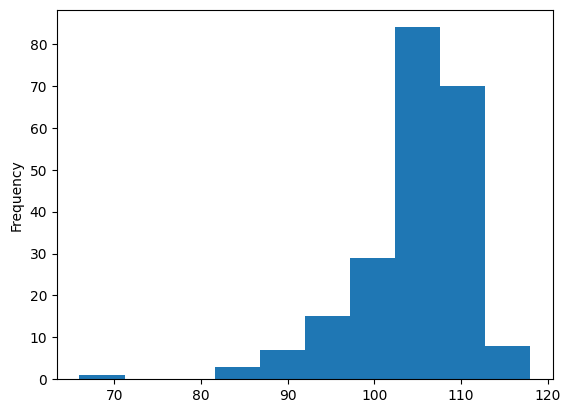

In [11]:
filmsp = mistat.load_data('FILMSP')
filmsp.plot.hist()
plt.show()

# Exercise 11

In [12]:
coal = mistat.load_data('COAL')
pd.DataFrame(coal.value_counts(sort=False))

,COAL
3,17
6,3
4,6
0,33
5,5
2,18
7,1
1,28


# Exercise 12

In [13]:
car = mistat.load_data('CAR')
car['cyl'].value_counts(sort=False)

4    66
6    30
8    13
Name: cyl, dtype: int64

In [14]:
pd.cut(car['turn'], bins=range(28, 46, 2)).value_counts(sort=False)

(28, 30]     3
(30, 32]    16
(32, 34]    16
(34, 36]    26
(36, 38]    20
(38, 40]    18
(40, 42]     8
(42, 44]     2
Name: turn, dtype: int64

In [15]:
pd.cut(car['hp'], bins=range(50, 275, 25)).value_counts(sort=False)

(50, 75]       7
(75, 100]     34
(100, 125]    22
(125, 150]    18
(150, 175]    17
(175, 200]     6
(200, 225]     4
(225, 250]     1
Name: hp, dtype: int64

In [16]:
pd.cut(car['mpg'], bins=range(9, 38, 5)).value_counts(sort=False)

(9, 14]      1
(14, 19]    42
(19, 24]    41
(24, 29]    22
(29, 34]     3
Name: mpg, dtype: int64

# Exercise 13

In [17]:
filmsp = mistat.load_data('FILMSP')
filmsp = filmsp.sort_values(ignore_index=True)  # sort and reset index

print(filmsp.quantile(q=[0, 0.25, 0.5, 0.75, 1.0]))
print(filmsp.quantile(q=[0.8, 0.9, 0.99]))

0.00     66.0
0.25    102.0
0.50    105.0
0.75    109.0
1.00    118.0
Name: FILMSP, dtype: float64
0.80    109.8
0.90    111.0
0.99    114.0
Name: FILMSP, dtype: float64


In [18]:
def calculate_quantile(x, q):
  idx = (len(x) - 1) * q
  left = math.floor(idx)
  right = math.ceil(idx)
  return 0.5 * (x[left] + x[right])

for q in (0, 0.25, 0.5, 0.75, 0.8, 0.9, 0.99, 1.0):
  print(q, calculate_quantile(filmsp, q))

0 66.0
0.25 102.0
0.5 105.0
0.75 109.0
0.8 109.5
0.9 111.0
0.99 114.0
1.0 118.0


# Exercise 14

In [19]:
filmsp = mistat.load_data('FILMSP')
n = len(filmsp)
mean = filmsp.mean()
deviations = [film - mean for film in filmsp]
S = math.sqrt(sum(deviation**2 for deviation in deviations) / n)

skewness = sum(deviation**3 for deviation in deviations) / n / (S**3)
kurtosis = sum(deviation**4 for deviation in deviations) / n / (S**4)
print('Python:\n',
      f'Skewness: {skewness}, Kurtosis: {kurtosis}')

print('Pandas:\n',
      f'Skewness: {filmsp.skew()}, Kurtosis: {filmsp.kurtosis()}')

Python:
 Skewness: -1.8098727695275856, Kurtosis: 9.014427238360716
Pandas:
 Skewness: -1.8224949285588137, Kurtosis: 6.183511188870432


# Exercise 15

In [20]:
car = mistat.load_data('CAR')
car['mpg'].groupby(by=car['origin']).mean()
car['mpg'].groupby(by=car['origin']).std()
# calculate both at the same time
print(car['mpg'].groupby(by=car['origin']).agg(['mean', 'std']))

             mean       std
origin                     
1       20.931034  3.597573
2       19.500000  2.623855
3       23.108108  4.280341


# Exercise 16

In [21]:
car = mistat.load_data('CAR')
car_US = car[car['origin'] == 1]
gamma = car_US['turn'].std() / car_US['turn'].mean()

# Exercise 17

In [22]:
car = mistat.load_data('CAR')

car_US = car[car['origin'] == 1]
car_Asia = car[car['origin'] == 3]
print('US')
print('mean', car_US['turn'].mean())
print('geometric mean', stats.gmean(car_US['turn']))
print('Japanese')
print('mean', car_Asia['turn'].mean())
print('geometric mean', stats.gmean(car_Asia['turn']))

US
mean 37.203448275862065
geometric mean 37.06877691910792
Japanese
mean 33.04594594594595
geometric mean 32.97599107553825


# Exercise 18

In [23]:
filmsp = mistat.load_data('FILMSP')

Xbar = filmsp.mean()
S = filmsp.std()
print(f'mean: {Xbar}, stddev: {S}')
expected = {1: 0.68, 2: 0.95, 3: 0.997}
for k in (1, 2, 3):
  left = Xbar - k * S
  right = Xbar + k * S
  proportion = sum(left < film < right for film in filmsp)
  print(f'X +/- {k}S: ',
        f'actual freq. {proportion}, ',
        f'pred. freq. {expected[k] * len(filmsp):.2f}')

mean: 104.59447004608295, stddev: 6.547657682704987
X +/- 1S:  actual freq. 173,  pred. freq. 147.56
X +/- 2S:  actual freq. 205,  pred. freq. 206.15
X +/- 3S:  actual freq. 213,  pred. freq. 216.35


# Exercise 19

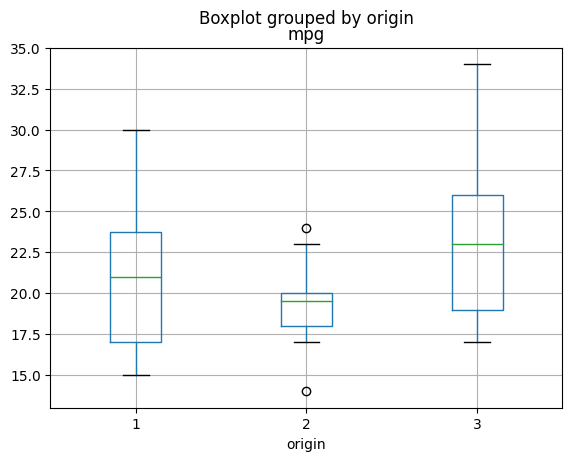

In [24]:
car = mistat.load_data('CAR')
car.boxplot(column='mpg', by='origin')
plt.show()

# Exercise 20

In [25]:
oturb = mistat.load_data('OTURB')
mistat.stemLeafDiagram(oturb, 2, leafUnit=0.01)

       4      2   3444
      18      2   55555666677789
      40      3   0000001111112222333345
    (15)      3   566677788899999
      45      4   00022334444
      34      4   566888999
      25      5   0112333
      18      5   6789
      14      6   01122233444
       3      6   788


# Exercise 21

In [26]:
from scipy.stats import trim_mean

oturb = mistat.load_data('OTURB')
print(f'T(0.1) = {trim_mean(oturb, 0.1)}')
print(f'S(0.1) = {trim_std(oturb, 0.1)}')

T(0.1) = 0.40558750000000005
S(0.1) = 0.09982289003530202


# Exercise 22

In [27]:
germanCars = [10, 10.9, 4.8, 6.4, 7.9, 8.9, 8.5, 6.9, 7.1,
              5.5, 6.4, 8.7, 5.1, 6.0, 7.5]
japaneseCars = [9.4, 9.5, 7.1, 8.0, 8.9, 7.7, 10.5, 6.5, 6.7,
                9.3, 5.7, 12.5, 7.2, 9.1, 8.3, 8.2, 8.5, 6.8, 9.5, 9.7]
# convert to pandas Series
germanCars = pd.Series(germanCars)
japaneseCars = pd.Series(japaneseCars)
# use describe to calculate statistics
comparison = pd.DataFrame({
  'German': germanCars.describe(),
  'Japanese': japaneseCars.describe(),
})
print(comparison)

          German   Japanese
count  15.000000  20.000000
mean    7.373333   8.455000
std     1.780235   1.589596
min     4.800000   5.700000
25%     6.200000   7.175000
50%     7.100000   8.400000
75%     8.600000   9.425000
max    10.900000  12.500000


# Exercise 23

In [28]:
hadpas = mistat.load_data('HADPAS')
sampleStatistics = pd.DataFrame({
  'res3': hadpas['res3'].describe(),
  'res7': hadpas['res7'].describe(),
})
print(sampleStatistics)

              res3         res7
count   192.000000   192.000000
mean   1965.239583  1857.776042
std     163.528165   151.535930
min    1587.000000  1420.000000
25%    1860.000000  1772.250000
50%    1967.000000  1880.000000
75%    2088.750000  1960.000000
max    2427.000000  2200.000000


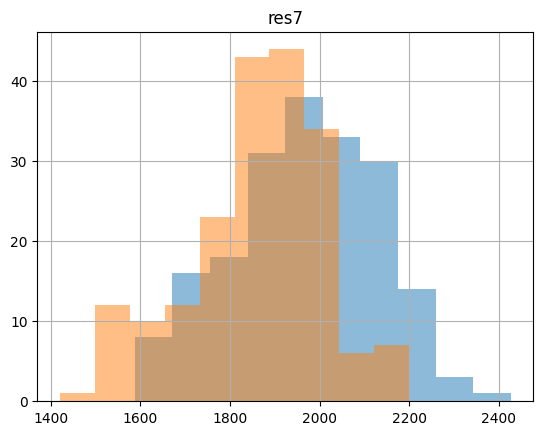

In [29]:
ax = hadpas.hist(column='res3', alpha=0.5)
hadpas.hist(column='res7', alpha=0.5, ax=ax)
plt.show()

In [30]:
print('res3')
mistat.stemLeafDiagram(hadpas['res3'], 2, leafUnit=10)
print('res7')
mistat.stemLeafDiagram(hadpas['res7'], 2, leafUnit=10)

res3
       1     15   8
       6     16   01124
      14     16   56788889
      22     17   00000234
      32     17   5566667899
      45     18   0011112233444
      60     18   556666677888899
      87     19   000000111111223333344444444
    (18)     19   566666666667888889
      87     20   00000000122222333334444
      64     20   55556666666677789999
      44     21   0000011222233344444
      25     21   566667788888
      13     22   000111234
       4     22   668
       0     23 
       1     24   2
res7
       1     14   2
       9     15   11222244
      15     15   667789
      23     16   00012334
      30     16   5566799
      40     17   0022233334
      54     17   66666666777999
      79     18   0000222222222233344444444
    (28)     18   5555556666666778888888999999
      85     19   000000001111112222222233333444444
      52     19   566666667777888888889999
      28     20   0000111222333444
      12     20   678
       9     21   1123344
       2     21   8
 

# Exercise 24

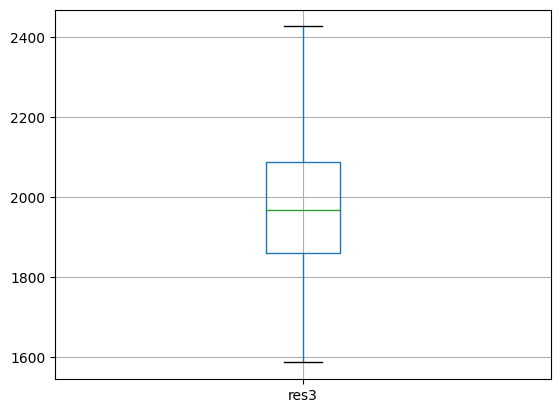

In [31]:
hadpas.boxplot(column='res3')
plt.show()